# Température chiot infCroiss

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [32]:
data = pd.read_excel("Data1_ImmuweanBIS.xlsx")
data

,ID,ID_litter,Size,litt_size,sex,group,IgGJ2,TPI,Died,Diarr,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,L2A,2,S,5,M,L,NaN,NaN,1,1,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,L2B,2,S,5,F,L,NaN,NaN,0,1,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,L2C,2,S,5,M,C,NaN,NaN,0,0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,L2D,2,S,5,F,L,NaN,NaN,0,1,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,L2E,2,S,5,F,C,NaN,NaN,0,1,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,L54A,54,M,8,M,C,"0,73",0.0,0,0,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,L54C,54,M,8,F,L,NaN,NaN,0,0,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,L54G,54,M,8,M,C,"4,7",1.0,0,0,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,L55F,55,S,7,M,C,"4,84",1.0,0,0,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [33]:
del data['ID']
del data['ID_litter']
del data['litt_size']
del data['sex']
del data['group']
del data['IgGJ2']
del data['TPI']
data

,Size,Died,Diarr,Age_D1,AgeD2,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,1,28.0,NaN,1,NaN,1,0,0,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,S,0,1,29.0,NaN,0,0.0,1,0,0,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,S,0,0,NaN,NaN,0,0.0,0,1,0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,S,0,1,54.0,NaN,1,0.0,0,1,0,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,S,0,1,52.0,NaN,1,1.0,0,1,0,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,M,0,0,NaN,NaN,0,0.0,0,1,0,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,M,0,0,NaN,NaN,0,NaN,0,0,0,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,M,0,0,NaN,NaN,0,0.0,0,0,0,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,S,0,0,NaN,NaN,0,0.0,0,0,0,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [34]:
del data['Age_D1']
del data['AgeD2']
del data['Min1inflcr']
data

,Size,Died,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,1,1,NaN,1,0,0,0.0,NaN,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,S,0,1,0,0.0,1,0,0,0.0,0.0,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,S,0,0,0,0.0,0,1,0,0.0,0.0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,S,0,1,1,0.0,0,1,0,0.0,0.0,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,S,0,1,1,1.0,0,1,0,0.0,1.0,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,M,0,0,0,0.0,0,1,0,1.0,0.0,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,M,0,0,0,NaN,0,0,0,0.0,NaN,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,M,0,0,0,0.0,0,0,0,0.0,0.0,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,S,0,0,0,0.0,0,0,0,0.0,0.0,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [35]:
data = data.sort_values(by=['Died', 'Size'], ascending=False)
data

,Size,Died,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,1,1,NaN,1,0,0,0.0,NaN,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
9,S,1,0,0,NaN,0,0,1,0.0,NaN,...,37.6,37.8,39.4,39.4,37.6,37.8,34.8,35.9,NaN,NaN
72,S,1,1,1,0.0,0,0,0,0.0,0.0,...,38.5,38.4,38.3,38.5,38.6,39.0,39.2,39.3,38.4,NaN
89,S,1,1,1,NaN,0,0,0,1.0,NaN,...,38.6,38.3,38.9,38.3,40.2,NaN,NaN,NaN,NaN,NaN
125,S,1,1,1,NaN,0,0,0,NaN,NaN,...,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,L,0,1,0,0.0,0,1,0,1.0,0.0,...,38.2,37.9,38.4,38.7,37.9,38.8,38.2,38.4,39.0,38.7
155,L,0,0,0,0.0,0,0,1,0.0,0.0,...,37.8,38.4,38.0,38.9,38.1,38.4,38.1,38.2,38.1,38.3
156,L,0,0,0,0.0,0,0,0,0.0,0.0,...,38.0,37.8,38.3,38.8,38.1,38.5,38.5,38.6,38.9,38.3
157,L,0,0,0,0.0,0,0,0,0.0,0.0,...,37.7,38.7,38.0,38.6,38.2,38.3,38.3,38.1,37.8,38.8


### Taille S 

In [16]:
data=data.query('Size == "S"')
del data['Size']
data

,Died,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,TRD21,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,1,1,1,NaN,1,0,0,0.0,NaN,37.5,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
9,1,0,0,NaN,0,0,1,0.0,NaN,37.7,...,37.6,37.8,39.4,39.4,37.6,37.8,34.8,35.9,NaN,NaN
72,1,1,1,0.0,0,0,0,0.0,0.0,37.8,...,38.5,38.4,38.3,38.5,38.6,39.0,39.2,39.3,38.4,NaN
89,1,1,1,NaN,0,0,0,1.0,NaN,37.4,...,38.6,38.3,38.9,38.3,40.2,NaN,NaN,NaN,NaN,NaN
125,1,1,1,NaN,0,0,0,NaN,NaN,37.4,...,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,0.0,0,1,0,0.0,0.0,37.2,...,38.8,38.2,37.7,38.6,39.1,38.3,38.6,38.8,NaN,38.0
148,0,1,0,0.0,0,0,0,0.0,1.0,36.6,...,38.6,38.6,38.1,38.4,38.7,38.6,39.8,38.6,38.5,38.6
161,0,0,0,0.0,1,0,1,0.0,0.0,37.5,...,38.6,38.7,38.3,38.6,38.1,38.6,38.7,38.2,37.8,38.6
165,0,0,0,0.0,0,0,0,0.0,0.0,37.2,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [17]:
data = np.array(data)

In [19]:
for i in range(0,70):
    if(data[i,4]==1 or data[i,5]==1 or data[i,6]==1 or data[i,7]==1 or data[i,8]==1):
        data[i,3] = 1
    else:
        data[i,3] = 0
data[0]

array([ 1. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  0. ,  nan, 37.5, 37.5,
       37.5, 37.8, 37.7, 37.8, 37.3, 37.9, 37.5, 37.7, 37.8, 38.3, 38. ,
       38.1, 37.9, 38. , 37.8, 38.2, 38. , 38.5, 38.3, 37.7, 38.4, 38.4,
       38.8, 38.5, 38.4, 38.4, 38.2, 38.4, 38.9, 38.7, 38.5, 38.7, 39. ,
        nan])

In [22]:
df = pd.DataFrame (data)
filepath = 'dataChiotCroissanceS.xlsx'
df.to_excel(filepath, index=False)

In [25]:
data = pd.read_excel('dataChiotCroissanceS.xlsx', skiprows=1, header=None, nrows=200, usecols=[0,1,2,3], names=["Mort", "Diarrhee", "Hospitalisation", "InfCroiss"])
data

,Mort,Diarrhee,Hospitalisation,InfCroiss
0,1,1,1,1
1,1,0,0,1
2,1,1,1,0
3,1,1,1,1
4,1,1,1,0
...,...,...,...,...
65,0,0,0,1
66,0,1,0,1
67,0,0,0,1
68,0,0,0,0


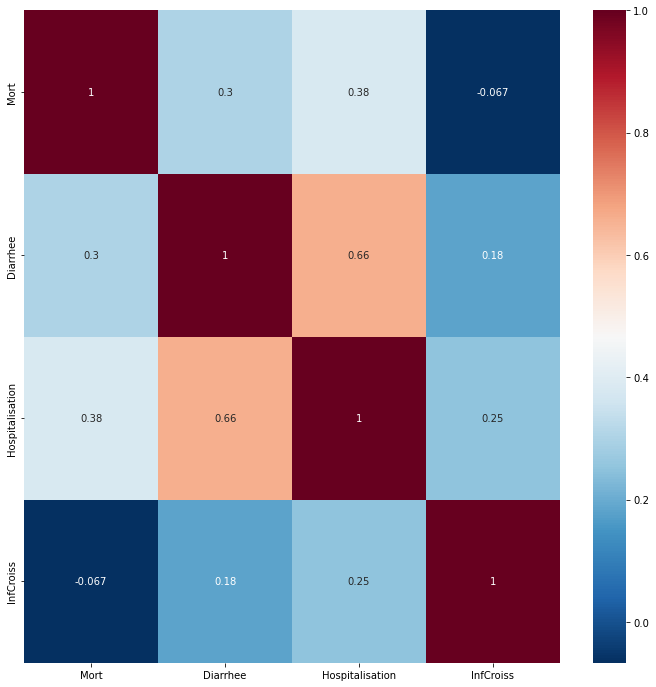

In [26]:
from sklearn.feature_selection import SelectKBest

import seaborn as sns

plt.figure(figsize=(12,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.show()

### Taille L 

In [36]:
dataL=data.query('Size == "L"')
del dataL['Size']
dataL

,Died,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,TRD21,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
18,1,1,1,NaN,0,0,0,NaN,NaN,37.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1,1,1,1.0,0,0,0,1.0,1.0,37.5,...,38.7,37.4,38.0,38.5,38.8,38.5,NaN,NaN,NaN,NaN
39,1,1,1,NaN,1,0,0,0.0,NaN,37.1,...,37.6,38.2,38.8,37.8,39.0,38.1,38.2,37.9,38.3,NaN
40,1,1,1,NaN,0,0,0,0.0,NaN,36.9,...,38.1,38.5,38.4,38.1,38.0,39.2,39.5,38.4,NaN,NaN
41,1,1,1,NaN,1,0,0,0.0,NaN,37.2,...,38.2,38.1,37.7,38.9,39.3,38.5,39.3,38.2,39.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,1,0,0.0,0,1,0,1.0,0.0,37.2,...,38.2,37.9,38.4,38.7,37.9,38.8,38.2,38.4,39.0,38.7
155,0,0,0,0.0,0,0,1,0.0,0.0,37.5,...,37.8,38.4,38.0,38.9,38.1,38.4,38.1,38.2,38.1,38.3
156,0,0,0,0.0,0,0,0,0.0,0.0,37.5,...,38.0,37.8,38.3,38.8,38.1,38.5,38.5,38.6,38.9,38.3
157,0,0,0,0.0,0,0,0,0.0,0.0,37.5,...,37.7,38.7,38.0,38.6,38.2,38.3,38.3,38.1,37.8,38.8


In [37]:
dataL = np.array(dataL)

In [39]:
for i in range(0,67):
    if(dataL[i,4]==1 or dataL[i,5]==1 or dataL[i,6]==1 or dataL[i,7]==1 or dataL[i,8]==1):
        dataL[i,3] = 1
    else:
        dataL[i,3] = 0
dataL[0]

array([ 1. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  nan,  nan, 37.4, 37. ,
       37.1, 37.7, 37.8, 37.5, 37.6, 37.7, 38. , 37.8, 38.1, 38.2, 38.2,
       38.3, 38. , 38.3, 38.4, 38.5, 37.9, 38.2, 37.7, 39.4,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

In [41]:
df = pd.DataFrame (dataL)
filepath = 'dataChiotCroissanceL.xlsx'
df.to_excel(filepath, index=False)

In [42]:
dataL = pd.read_excel('dataChiotCroissanceL.xlsx', skiprows=1, header=None, nrows=200, usecols=[0,1,2,3], names=["Mort", "Diarrhee", "Hospitalisation", "InfCroiss"])
dataL

,Mort,Diarrhee,Hospitalisation,InfCroiss
0,1,1,1,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,0
4,1,1,1,1
...,...,...,...,...
62,0,1,0,1
63,0,0,0,1
64,0,0,0,0
65,0,0,0,0


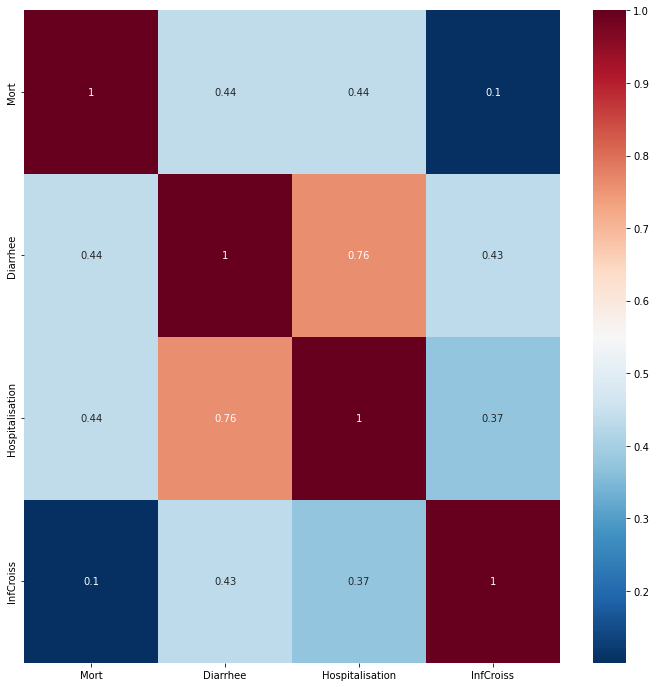

In [44]:
from sklearn.feature_selection import SelectKBest

import seaborn as sns

plt.figure(figsize=(12,12))
cor = dataL.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.show()

### Taille M 

In [45]:
dataM=data.query('Size == "M"')
del dataM['Size']
dataM

,Died,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,TRD21,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
45,1,0,0,NaN,0,0,0,0.0,NaN,37.3,...,38.0,38.6,38.2,38.1,38.7,38.8,38.8,NaN,NaN,NaN
53,1,1,0,NaN,0,1,0,1.0,NaN,37.1,...,38.4,38.6,39.0,38.6,37.8,38.6,38.5,39.5,39.3,38.8
46,0,1,0,0.0,0,1,0,0.0,0.0,37.1,...,37.8,38.9,38.4,38.1,38.1,38.9,38.5,38.5,38.8,38.7
47,0,1,0,0.0,0,0,0,0.0,0.0,37.2,...,38.6,38.7,38.3,38.5,38.3,38.4,38.9,38.4,40.2,39.0
48,0,1,0,0.0,0,1,0,0.0,0.0,36.9,...,38.0,38.6,38.5,38.0,38.1,38.9,36.6,38.5,38.7,NaN
49,0,0,0,0.0,0,1,0,0.0,0.0,37.4,...,38.0,38.6,38.5,38.3,38.3,39.0,38.8,38.5,39.7,39.5
50,0,1,0,0.0,0,0,0,0.0,0.0,37.7,...,38.1,38.8,39.0,38.6,38.6,38.2,39.1,38.2,39.0,38.1
51,0,1,1,0.0,0,0,0,1.0,0.0,37.0,...,37.6,38.1,38.5,38.4,37.9,39.0,38.4,38.1,38.1,39.3
52,0,1,0,0.0,1,0,0,0.0,1.0,37.1,...,37.4,38.2,38.7,38.3,38.1,38.7,38.9,38.5,38.3,39.3
60,0,0,0,NaN,0,0,0,0.0,NaN,37.1,...,38.5,38.4,38.2,38.4,37.4,NaN,NaN,NaN,NaN,NaN


In [46]:
dataM = np.array(dataM)

In [47]:
for i in range(0,30):
    if(dataM[i,4]==1 or dataM[i,5]==1 or dataM[i,6]==1 or dataM[i,7]==1 or dataM[i,8]==1):
        dataM[i,3] = 1
    else:
        dataM[i,3] = 0
dataM[0]

array([ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  nan, 37.3, 37. ,
       37.6, 37.8, 37.6, 37.1, 36.8, 36.8, 37.2, 37.7, 38.1, 37.9, 37.7,
       37.5, 37.9, 37.8, 38.5, 38. ,  nan, 38.5, 38.1, 38.1, 38.4, 37.6,
       39.2, 37.7, 38. , 38.6, 38.2, 38.1, 38.7, 38.8, 38.8,  nan,  nan,
        nan])

In [48]:
df = pd.DataFrame (dataM)
filepath = 'dataChiotCroissanceM.xlsx'
df.to_excel(filepath, index=False)

In [49]:
dataM = pd.read_excel('dataChiotCroissanceM.xlsx', skiprows=1, header=None, nrows=200, usecols=[0,1,2,3], names=["Mort", "Diarrhee", "Hospitalisation", "InfCroiss"])
dataM

,Mort,Diarrhee,Hospitalisation,InfCroiss
0,1,0,0,0
1,1,1,0,1
2,0,1,0,1
3,0,1,0,0
4,0,1,0,1
5,0,0,0,1
6,0,1,0,0
7,0,1,1,1
8,0,1,0,1
9,0,0,0,0


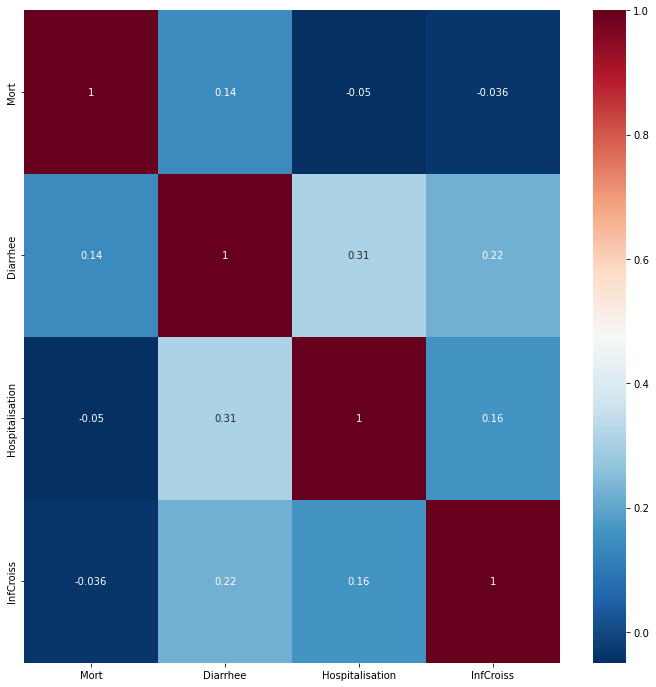

In [51]:
from sklearn.feature_selection import SelectKBest

import seaborn as sns

plt.figure(figsize=(12,12))
cor = dataM.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.show()